# 6.3 Practical Applications of Sampling and Confidence Intervals

This section demonstrates real-world applications of sampling theory and confidence intervals across various domains.

## Application 1: A/B Testing in Web Development

### The Problem

You're testing two website designs. Design A has 1000 visitors with 120 conversions (12%). Design B has 1000 visitors with 145 conversions (14.5%). Is Design B actually better?

### Solution

Design A:
  Conversion rate: 12.0%
  95% CI: [10.0%, 14.0%]

Design B:
  Conversion rate: 14.5%
  95% CI: [12.3%, 16.7%]


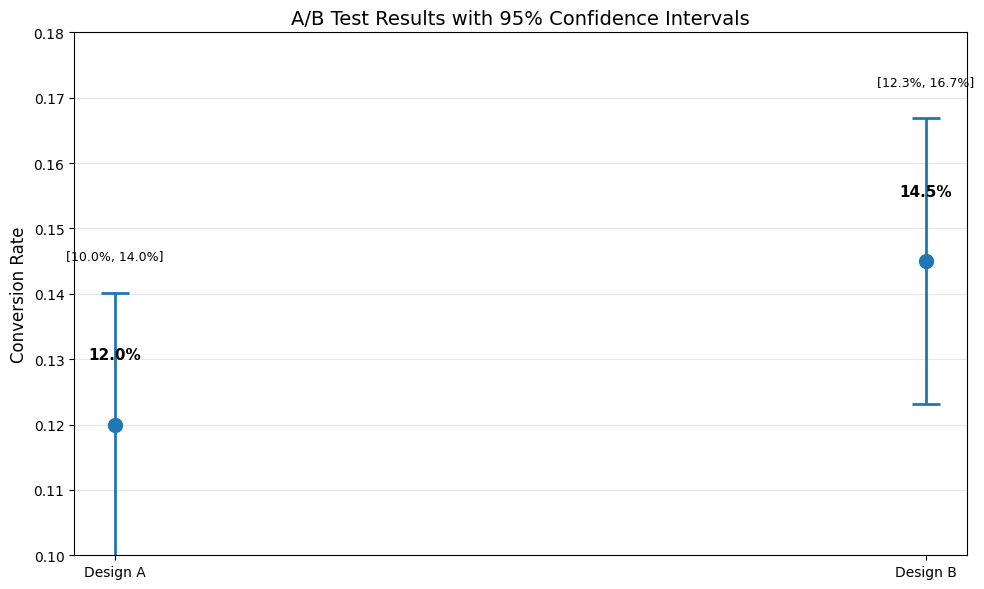


Conclusion: The CIs overlap - need more data or formal significance test
Overlap region: [12.3%, 14.0%]


In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def proportion_ci(successes, n, confidence=0.95):
    """
    Confidence interval for a proportion using normal approximation.
    """
    p_hat = successes / n
    se = np.sqrt(p_hat * (1 - p_hat) / n)
    
    alpha = 1 - confidence
    z_crit = stats.norm.ppf(1 - alpha/2)
    
    margin = z_crit * se
    ci_lower = p_hat - margin
    ci_upper = p_hat + margin
    
    return p_hat, ci_lower, ci_upper, se

# Data
n_A = 1000
conversions_A = 120

n_B = 1000
conversions_B = 145

# Compute CIs
p_A, lower_A, upper_A, se_A = proportion_ci(conversions_A, n_A)
p_B, lower_B, upper_B, se_B = proportion_ci(conversions_B, n_B)

print("Design A:")
print(f"  Conversion rate: {p_A:.1%}")
print(f"  95% CI: [{lower_A:.1%}, {upper_A:.1%}]")
print(f"\nDesign B:")
print(f"  Conversion rate: {p_B:.1%}")
print(f"  95% CI: [{lower_B:.1%}, {upper_B:.1%}]")

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))

designs = ['Design A', 'Design B']
rates = [p_A, p_B]
errors = [(p_A - lower_A, upper_A - p_A), (p_B - lower_B, upper_B - p_B)]

ax.errorbar(designs, rates, yerr=np.array(errors).T, fmt='o', 
            markersize=10, capsize=10, capthick=2, linewidth=2)
ax.set_ylabel('Conversion Rate', fontsize=12)
ax.set_title('A/B Test Results with 95% Confidence Intervals', fontsize=14)
ax.grid(axis='y', alpha=0.3)
ax.set_ylim(0.10, 0.18)

for i, (design, rate, (l, u)) in enumerate(zip(designs, rates, [(lower_A, upper_A), (lower_B, upper_B)])):
    ax.text(i, rate + 0.01, f'{rate:.1%}', ha='center', fontsize=11, fontweight='bold')
    ax.text(i, u + 0.005, f'[{l:.1%}, {u:.1%}]', ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('ab_test_results.png', dpi=150, bbox_inches='tight')
plt.show()

# Check for overlap
if upper_A < lower_B:
    print("\nConclusion: Design B is significantly better (CIs don't overlap)")
elif lower_A > upper_B:
    print("\nConclusion: Design A is significantly better (CIs don't overlap)")
else:
    print("\nConclusion: The CIs overlap - need more data or formal significance test")
    print(f"Overlap region: [{max(lower_A, lower_B):.1%}, {min(upper_A, upper_B):.1%}]")

### Interpretation

The confidence intervals overlap, suggesting we cannot conclusively say Design B is better. We need:
- More data, or
- A formal hypothesis test (Chapter 7)

## Application 2: Quality Control in Manufacturing

### The Problem

A factory produces bolts with target diameter 10.0 mm. Quality control samples 25 bolts daily. Today's sample has mean 10.15 mm with standard deviation 0.30 mm. Is the process still on target?

### Solution

Sample: n=25, mean=10.150 mm, std=0.300 mm

95% CI for population mean: [10.026, 10.274] mm
Target value: 10.000 mm

Conclusion: Target 10.0 mm is NOT in the 95% CI
Process may be off-target - investigate!


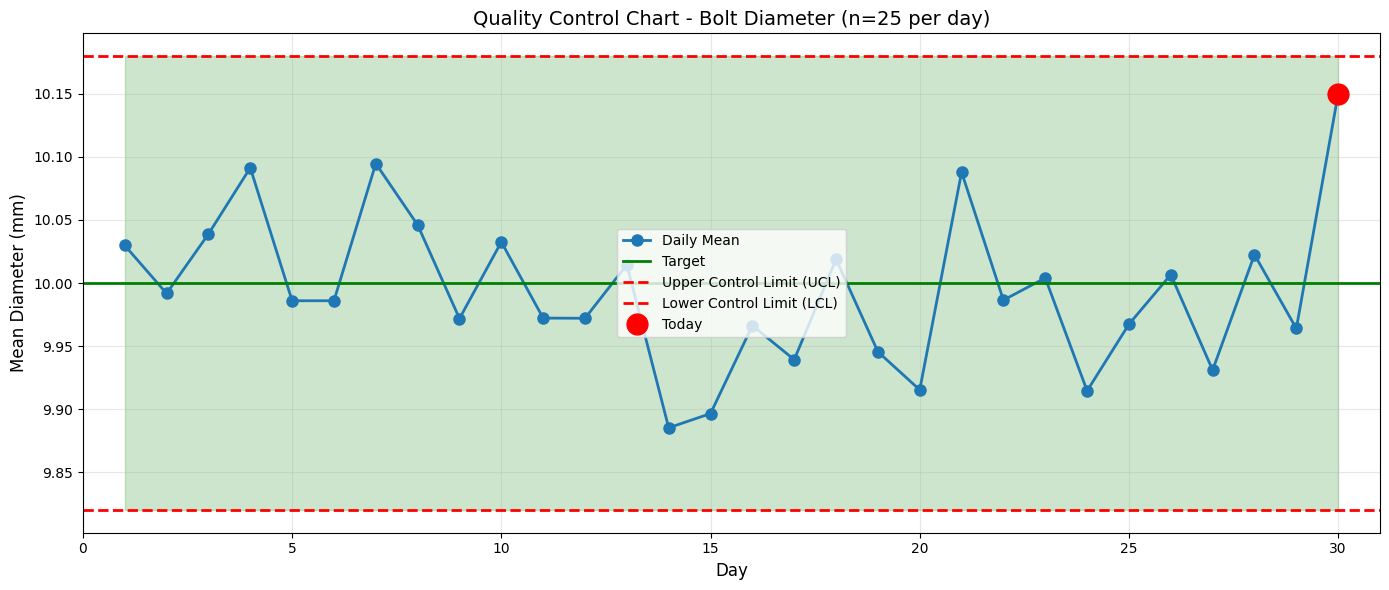

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Today's sample
n = 25
sample_mean = 10.15
sample_std = 0.30
target = 10.0

# Compute 95% CI
se = sample_std / np.sqrt(n)
df = n - 1
t_crit = stats.t.ppf(0.975, df)
margin = t_crit * se

ci_lower = sample_mean - margin
ci_upper = sample_mean + margin

print(f"Sample: n={n}, mean={sample_mean:.3f} mm, std={sample_std:.3f} mm")
print(f"\n95% CI for population mean: [{ci_lower:.3f}, {ci_upper:.3f}] mm")
print(f"Target value: {target:.3f} mm")

if ci_lower <= target <= ci_upper:
    print(f"\nConclusion: Target {target} mm IS within the 95% CI")
    print("Process appears to be on target.")
else:
    print(f"\nConclusion: Target {target} mm is NOT in the 95% CI")
    print("Process may be off-target - investigate!")
    
# Visualize control chart
np.random.seed(42)
days = 30
daily_means = np.random.normal(10.0, 0.3/np.sqrt(25), days-1).tolist() + [sample_mean]
daily_means = np.array(daily_means)

# Control limits (3-sigma)
control_center = 10.0
control_std = 0.3 / np.sqrt(25)  # Std error of mean
ucl = control_center + 3 * control_std  # Upper control limit
lcl = control_center - 3 * control_std  # Lower control limit

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(range(1, days+1), daily_means, 'o-', linewidth=2, markersize=8, label='Daily Mean')
ax.axhline(control_center, color='green', linestyle='-', linewidth=2, label='Target')
ax.axhline(ucl, color='red', linestyle='--', linewidth=2, label='Upper Control Limit (UCL)')
ax.axhline(lcl, color='red', linestyle='--', linewidth=2, label='Lower Control Limit (LCL)')

# Highlight today's point
ax.plot(days, sample_mean, 'ro', markersize=15, label='Today', zorder=10)

ax.fill_between(range(1, days+1), lcl, ucl, alpha=0.2, color='green')
ax.set_xlabel('Day', fontsize=12)
ax.set_ylabel('Mean Diameter (mm)', fontsize=12)
ax.set_title('Quality Control Chart - Bolt Diameter (n=25 per day)', fontsize=14)
ax.legend(fontsize=10)
ax.grid(alpha=0.3)
ax.set_xlim(0, days+1)

plt.tight_layout()
plt.savefig('quality_control_chart.png', dpi=150, bbox_inches='tight')
plt.show()

### Action Items

1. **Investigation needed**: The process appears to be producing bolts with mean > 10.0 mm
2. **Check calibration**: Machines may need recalibration
3. **Continue monitoring**: Track next few days closely

## Application 3: Survey Sampling - Election Polling

### The Problem

A political poll surveys 800 voters. 432 support Candidate A (54%). What's the margin of error? How many voters needed for ±3% margin?

### Solution

Current Poll Results:
  Sample size: 800
  Support for Candidate A: 54.0%
  Standard error: 1.762%
  Margin of error (95%): ±3.5%
  95% CI: [50.5%, 57.5%]

Report: Candidate A has 54% ± 3% support

Required Sample Sizes for Different Margins of Error
      Desired Margin |   Required n |  Cost Factor
----------------------------------------------------------------------
±1% (0.01)        |         9604 |         8.99x
±2% (0.02)        |         2401 |         2.25x
±3% (0.03)        |         1068 |         1.00x
±4% (0.04)        |          601 |         0.56x
±5% (0.05)        |          385 |         0.36x


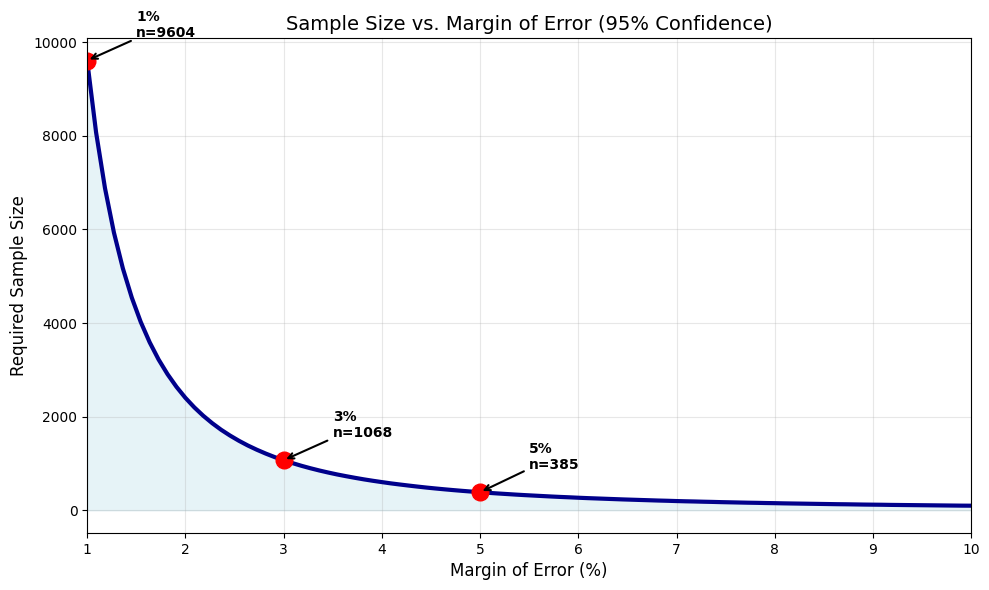

In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def poll_analysis(n, support, confidence=0.95):
    """Analyze poll results."""
    p_hat = support / n
    se = np.sqrt(p_hat * (1 - p_hat) / n)
    
    alpha = 1 - confidence
    z_crit = stats.norm.ppf(1 - alpha/2)
    
    margin = z_crit * se
    ci_lower = p_hat - margin
    ci_upper = p_hat + margin
    
    return {
        'p_hat': p_hat,
        'se': se,
        'margin': margin,
        'ci_lower': ci_lower,
        'ci_upper': ci_upper
    }

def required_sample_size(desired_margin, p_estimate=0.5, confidence=0.95):
    """Calculate required sample size for desired margin of error."""
    alpha = 1 - confidence
    z_crit = stats.norm.ppf(1 - alpha/2)
    
    # Use p=0.5 for most conservative estimate (maximum variance)
    n = (z_crit / desired_margin)**2 * p_estimate * (1 - p_estimate)
    return np.ceil(n)

# Current poll
n = 800
support = 432

results = poll_analysis(n, support)

print("Current Poll Results:")
print(f"  Sample size: {n}")
print(f"  Support for Candidate A: {results['p_hat']:.1%}")
print(f"  Standard error: {results['se']:.3%}")
print(f"  Margin of error (95%): ±{results['margin']:.1%}")
print(f"  95% CI: [{results['ci_lower']:.1%}, {results['ci_upper']:.1%}]")
print(f"\nReport: Candidate A has {results['p_hat']:.0%} ± {results['margin']:.0%} support")

# Sample size for different margins
print("\n" + "="*70)
print("Required Sample Sizes for Different Margins of Error")
print("="*70)
print(f"{'Desired Margin':>20s} | {'Required n':>12s} | {'Cost Factor':>12s}")
print("-" * 70)

base_n = required_sample_size(0.03)
for margin in [0.01, 0.02, 0.03, 0.04, 0.05]:
    req_n = required_sample_size(margin)
    cost_factor = req_n / base_n
    print(f"±{margin:.0%} ({margin:.2f})        | {req_n:12.0f} | {cost_factor:12.2f}x")

# Visualize relationship
margins = np.linspace(0.01, 0.10, 100)
sample_sizes = [required_sample_size(m) for m in margins]

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(margins * 100, sample_sizes, linewidth=3, color='darkblue')
ax.fill_between(margins * 100, 0, sample_sizes, alpha=0.3, color='lightblue')

# Mark common margins
common_margins = [0.01, 0.03, 0.05]
for cm in common_margins:
    req_n = required_sample_size(cm)
    ax.plot(cm * 100, req_n, 'ro', markersize=12)
    ax.annotate(f'{cm:.0%}\nn={req_n:.0f}', 
                xy=(cm*100, req_n), xytext=(cm*100+0.5, req_n+500),
                fontsize=10, fontweight='bold',
                arrowprops=dict(arrowstyle='->', lw=1.5))

ax.set_xlabel('Margin of Error (%)', fontsize=12)
ax.set_ylabel('Required Sample Size', fontsize=12)
ax.set_title('Sample Size vs. Margin of Error (95% Confidence)', fontsize=14)
ax.grid(alpha=0.3)
ax.set_xlim(1, 10)

plt.tight_layout()
plt.savefig('sample_size_vs_margin.png', dpi=150, bbox_inches='tight')
plt.show()

### Key Insights

1. **Current margin**: ±3.5% - Candidate A is likely ahead but not conclusively
2. **Cost of precision**: Reducing margin from ±3% to ±1% requires **9× more respondents**!
3. **Standard practice**: Most polls use n ≈ 1000 for ±3% margin

## Application 4: Medical Trial - Drug Efficacy

### The Problem

A new drug is tested on 40 patients. Blood pressure reduction: mean = 12.5 mmHg, std = 8.0 mmHg. Is there evidence of effectiveness?

### Solution

Clinical Trial Results:
  Sample size: 40 patients
  Mean BP reduction: 12.5 mmHg
  Standard deviation: 8.0 mmHg
  Standard error: 1.26 mmHg

95% CI for mean reduction: [9.94, 15.06] mmHg

Conclusion: The entire 95% CI is above 0
Strong evidence that the drug reduces blood pressure.
We're 95% confident the true mean reduction is at least 9.9 mmHg


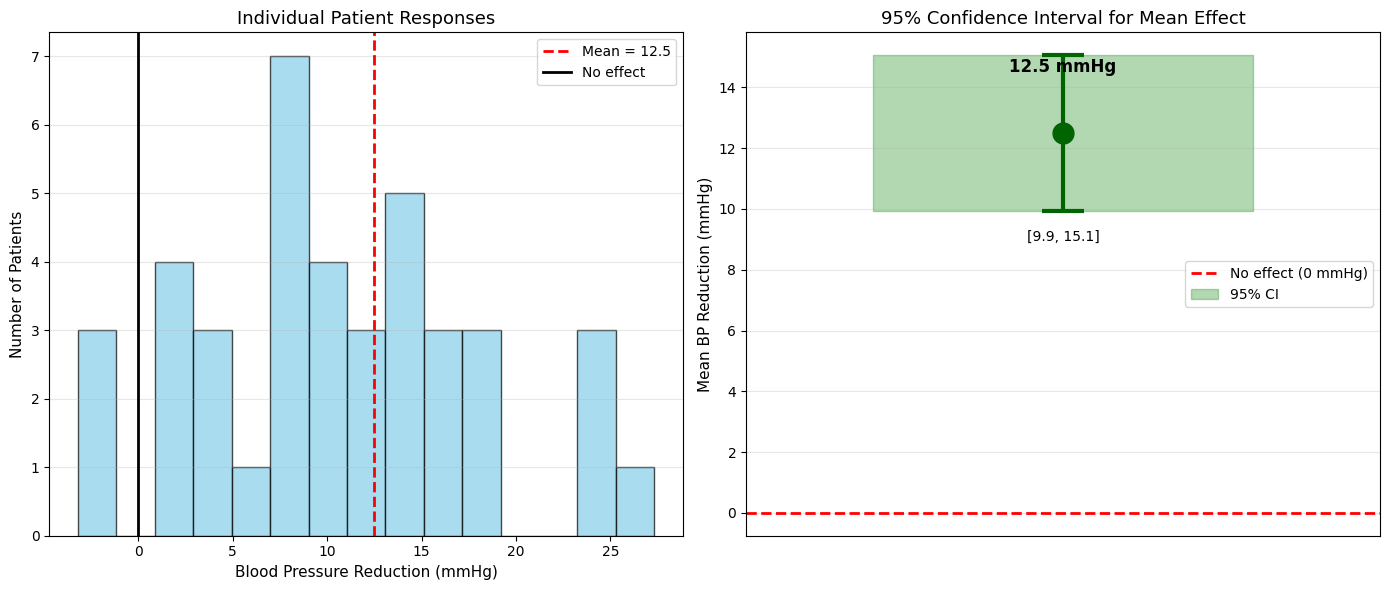


Sample Size Planning for Future Trials
For margin ±1.0 mmHg: need n ≈ 246 patients
For margin ±2.0 mmHg: need n ≈ 62 patients
For margin ±3.0 mmHg: need n ≈ 28 patients
For margin ±4.0 mmHg: need n ≈ 16 patients


In [4]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Trial data
n = 40
mean_reduction = 12.5
std_reduction = 8.0

# Compute 95% CI
se = std_reduction / np.sqrt(n)
df = n - 1
t_crit = stats.t.ppf(0.975, df)
margin = t_crit * se

ci_lower = mean_reduction - margin
ci_upper = mean_reduction + margin

print("Clinical Trial Results:")
print(f"  Sample size: {n} patients")
print(f"  Mean BP reduction: {mean_reduction:.1f} mmHg")
print(f"  Standard deviation: {std_reduction:.1f} mmHg")
print(f"  Standard error: {se:.2f} mmHg")
print(f"\n95% CI for mean reduction: [{ci_lower:.2f}, {ci_upper:.2f}] mmHg")

if ci_lower > 0:
    print(f"\nConclusion: The entire 95% CI is above 0")
    print("Strong evidence that the drug reduces blood pressure.")
    print(f"We're 95% confident the true mean reduction is at least {ci_lower:.1f} mmHg")
else:
    print(f"\nConclusion: The 95% CI includes 0")
    print("Insufficient evidence of effectiveness.")

# Simulate individual patient responses
np.random.seed(42)
patient_reductions = np.random.normal(mean_reduction, std_reduction, n)

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Distribution of individual responses
ax1.hist(patient_reductions, bins=15, edgecolor='black', alpha=0.7, color='skyblue')
ax1.axvline(mean_reduction, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_reduction:.1f}')
ax1.axvline(0, color='black', linestyle='-', linewidth=2, label='No effect')
ax1.set_xlabel('Blood Pressure Reduction (mmHg)', fontsize=11)
ax1.set_ylabel('Number of Patients', fontsize=11)
ax1.set_title('Individual Patient Responses', fontsize=13)
ax1.legend(fontsize=10)
ax1.grid(axis='y', alpha=0.3)

# CI visualization
ax2.errorbar([0], [mean_reduction], yerr=[[mean_reduction - ci_lower], [ci_upper - mean_reduction]], 
             fmt='o', markersize=15, capsize=15, capthick=3, linewidth=3, color='darkgreen')
ax2.axhline(0, color='red', linestyle='--', linewidth=2, label='No effect (0 mmHg)')
ax2.fill_between([-0.3, 0.3], ci_lower, ci_upper, alpha=0.3, color='green', label='95% CI')
ax2.set_ylabel('Mean BP Reduction (mmHg)', fontsize=11)
ax2.set_title('95% Confidence Interval for Mean Effect', fontsize=13)
ax2.set_xlim(-0.5, 0.5)
ax2.set_xticks([])
ax2.legend(fontsize=10)
ax2.grid(axis='y', alpha=0.3)

# Add text annotation
ax2.text(0, mean_reduction + 2, f'{mean_reduction:.1f} mmHg', 
         ha='center', fontsize=12, fontweight='bold')
ax2.text(0, ci_lower - 1, f'[{ci_lower:.1f}, {ci_upper:.1f}]', 
         ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('clinical_trial_results.png', dpi=150, bbox_inches='tight')
plt.show()

# Power analysis: How many patients for narrower CI?
print("\n" + "="*60)
print("Sample Size Planning for Future Trials")
print("="*60)
for desired_margin in [1.0, 2.0, 3.0, 4.0]:
    # n = (t * s / E)^2, use z approximation for planning
    n_required = np.ceil((1.96 * std_reduction / desired_margin)**2)
    print(f"For margin ±{desired_margin:.1f} mmHg: need n ≈ {n_required:.0f} patients")

## Application 5: Machine Learning - Model Performance Estimation

### The Problem

You trained a classifier and tested it on 200 samples. Accuracy: 85% (170/200 correct). What's the CI for the true accuracy?

### Solution

Model Performance:
  Test set size: 200
  Correct predictions: 170
  Accuracy: 85.0%
  95% CI: [80.1%, 89.9%]
  Margin: ±4.9%

Report: Model achieves 85% ± 5% accuracy

Effect of Test Set Size on CI Width (assuming 85% accuracy)
   Test Size |   Accuracy |                    95% CI |    Width
----------------------------------------------------------------------
          50 |     84.0% | [ 73.8%,  94.2%] |   20.3%
         100 |     85.0% | [ 78.0%,  92.0%] |   14.0%
         200 |     85.0% | [ 80.1%,  89.9%] |    9.9%
         500 |     85.0% | [ 81.9%,  88.1%] |    6.3%
        1000 |     85.0% | [ 82.8%,  87.2%] |    4.4%


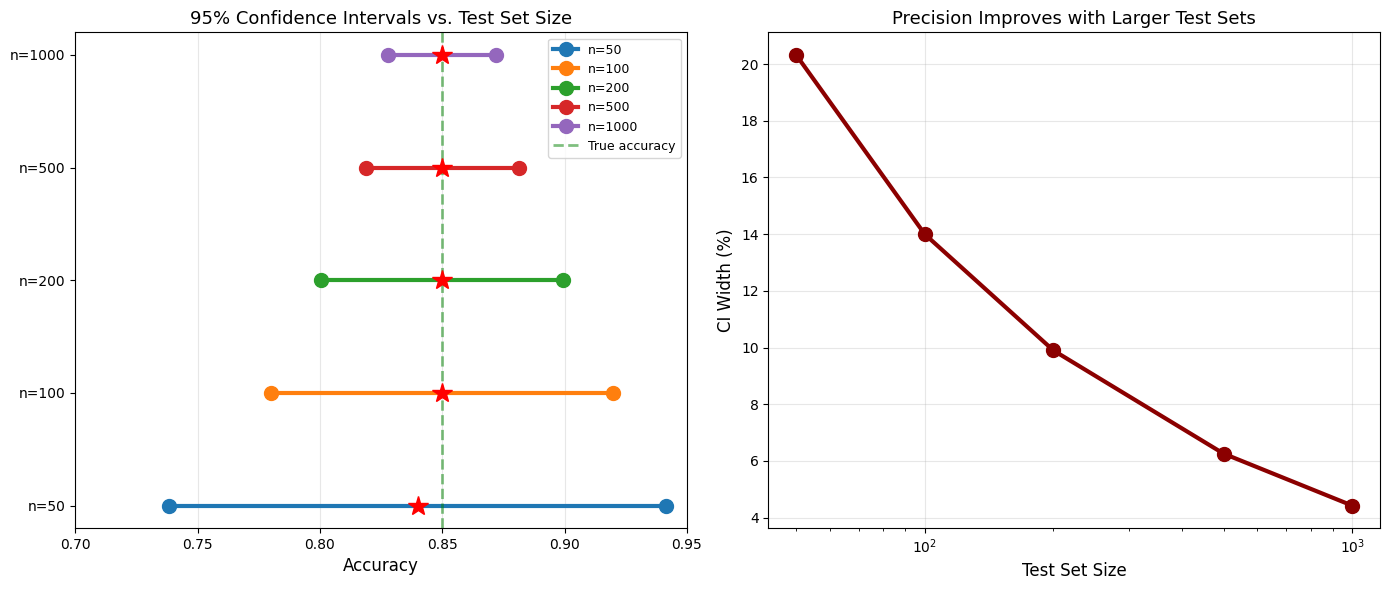

In [5]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def ml_accuracy_ci(n_correct, n_total, confidence=0.95):
    """CI for classification accuracy."""
    acc = n_correct / n_total
    se = np.sqrt(acc * (1 - acc) / n_total)
    
    alpha = 1 - confidence
    z_crit = stats.norm.ppf(1 - alpha/2)
    
    margin = z_crit * se
    ci_lower = max(0, acc - margin)  # Accuracy can't be negative
    ci_upper = min(1, acc + margin)  # Accuracy can't exceed 1
    
    return acc, ci_lower, ci_upper, margin

# Model evaluation
n_test = 200
n_correct = 170

acc, lower, upper, margin = ml_accuracy_ci(n_correct, n_test)

print("Model Performance:")
print(f"  Test set size: {n_test}")
print(f"  Correct predictions: {n_correct}")
print(f"  Accuracy: {acc:.1%}")
print(f"  95% CI: [{lower:.1%}, {upper:.1%}]")
print(f"  Margin: ±{margin:.1%}")
print(f"\nReport: Model achieves {acc:.0%} ± {margin:.0%} accuracy")

# Compare different test set sizes
test_sizes = [50, 100, 200, 500, 1000]

print("\n" + "="*70)
print("Effect of Test Set Size on CI Width (assuming 85% accuracy)")
print("="*70)
print(f"{'Test Size':>12s} | {'Accuracy':>10s} | {'95% CI':>25s} | {'Width':>8s}")
print("-" * 70)

for n in test_sizes:
    n_corr = int(0.85 * n)
    acc, lower, upper, margin = ml_accuracy_ci(n_corr, n)
    width = upper - lower
    print(f"{n:12d} | {acc:9.1%} | [{lower:6.1%}, {upper:6.1%}] | {width:7.1%}")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# CI comparison
test_sizes_plot = [50, 100, 200, 500, 1000]
results = [ml_accuracy_ci(int(0.85*n), n) for n in test_sizes_plot]

for idx, (n, (acc, lower, upper, margin)) in enumerate(zip(test_sizes_plot, results)):
    ax1.plot([lower, upper], [idx, idx], 'o-', linewidth=3, markersize=10, label=f'n={n}')
    ax1.plot(acc, idx, 'r*', markersize=15, zorder=10)

ax1.axvline(0.85, color='green', linestyle='--', linewidth=2, alpha=0.5, label='True accuracy')
ax1.set_yticks(range(len(test_sizes_plot)))
ax1.set_yticklabels([f'n={n}' for n in test_sizes_plot])
ax1.set_xlabel('Accuracy', fontsize=12)
ax1.set_title('95% Confidence Intervals vs. Test Set Size', fontsize=13)
ax1.legend(fontsize=9)
ax1.grid(alpha=0.3, axis='x')
ax1.set_xlim(0.70, 0.95)

# Width vs sample size
widths = [upper - lower for _, lower, upper, _ in results]
ax2.plot(test_sizes_plot, [w*100 for w in widths], 'o-', linewidth=3, markersize=10, color='darkred')
ax2.set_xlabel('Test Set Size', fontsize=12)
ax2.set_ylabel('CI Width (%)', fontsize=12)
ax2.set_title('Precision Improves with Larger Test Sets', fontsize=13)
ax2.grid(alpha=0.3)
ax2.set_xscale('log')

plt.tight_layout()
plt.savefig('ml_accuracy_ci.png', dpi=150, bbox_inches='tight')
plt.show()


## Summary of Applications

### Domain Coverage

| Domain | Use Case | Key Metric |
|--------|----------|------------|
| **Web/Tech** | A/B testing | Conversion rate CI |
| **Manufacturing** | Quality control | Process mean CI |
| **Politics** | Election polling | Support proportion CI |
| **Medicine** | Clinical trials | Treatment effect CI |
| **ML/AI** | Model evaluation | Accuracy CI |

### Universal Principles

1. **Always report uncertainty**: Point estimates alone are misleading
2. **Larger samples = narrower CIs**: Precision costs money/time
3. **Overlap ≠ equivalence**: Overlapping CIs don't prove no difference
4. **Context matters**: A 2% margin matters in elections, not so much in some ML tasks
5. **Plan sample sizes**: Calculate n needed before collecting data

### Common Sample Size Guidelines

- **Pilot studies**: n = 30-50
- **Election polls**: n = 1000-1500 (±3% margin)
- **Clinical trials**: n = hundreds to thousands (depends on effect size)
- **ML test sets**: n = 1000+ (for stable accuracy estimates)
- **A/B tests**: n = thousands per group (for small effect sizes)

## Practice Problems

### Problem 1: App Download Rate
Your mobile app has 50,000 daily visitors and 2,500 downloads (5% rate). Construct a 95% CI for the true download rate.

**Solution**:

In [6]:
n = 50000
downloads = 2500
p = downloads / n  # 0.05
se = np.sqrt(p * (1-p) / n)  # 0.000975
margin = 1.96 * se  # 0.00191
ci = (p - margin, p + margin)  # (0.0481, 0.0519) or (4.81%, 5.19%)


### Problem 2: Required Sample for Drug Trial
You want to detect a mean blood pressure reduction of 10 mmHg with margin ±2 mmHg. Population std is 12 mmHg. How many patients?

**Solution**:

In [ ]:
sigma = 12
E = 2
z = 1.96
n = (z * sigma / E)**2  # (1.96 * 12 / 2)^2 = 138.3 ≈ 139 patients

### Problem 3: Quality Control Decision
Bolt diameter CI: [9.92, 10.08] mm. Target: 10.0 mm. Spec limits: 9.90-10.10 mm. What action?

**Answer**: 
- Target 10.0 is in the CI ✓
- But CI extends beyond lower spec (9.92 < 9.90) ✗
- **Action**: Monitor closely, some bolts may be out of spec

## Conclusion

Confidence intervals are the foundation of statistical inference. They:

✓ Quantify uncertainty in estimates  
✓ Guide decision-making under uncertainty  
✓ Enable sample size planning  
✓ Provide context for comparing groups  
✓ Form the basis for hypothesis testing (Chapter 7)

Next chapter: **Statistical Significance** - formal hypothesis testing!